# **1. DATA LOADING AND LIBRARY IMPORTS**

In [ ]:
# Install the necessary dependencies
%pip install datasets
%pip install transformers
%pip install spacy
%pip install torch
%pip install spacy-transformers
%pip install transformers[torch]
%pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-n

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Natural_Language_Processing')

# Reload incase of any changes to the functions
from utilities import model_evaluate, compute_metrics, tokenize_and_align_labels

Mounted at /content/drive


/content/drive/MyDrive/Natural_Language_Processing/utilities.py:140: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("seqeval")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for seqeval contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.0/metrics/seqeval/seqeval.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [ ]:
from datasets import load_dataset, load_metric
dataset = load_dataset("surrey-nlp/PLOD-CW")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1072 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/126 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/153 [00:00<?, ? examples/s]

# 2. BERT

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

## 2.1 BERT FULL TRAINING

The code creates a configuration object (BertConfig) using BertConfig.from_pretrained and specifying "bert-base-uncased".

The config.num_labels parameter is set to 4, indicating that the model will be used for a token classification task with 4 labels.

A model is then created using the BertForTokenClassification class, passing in the configuration object.
This model is not loaded with pre-trained weights and will be trained from scratch.

In [ ]:
from transformers import AutoModelForTokenClassification, BertTokenizer, BertConfig, BertForTokenClassification
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# model without loading pre-trained weights
config = BertConfig.from_pretrained("bert-base-uncased")
config.num_labels = 4
model = BertForTokenClassification(config=config)

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
train_dataset = dataset["train"]
val_dataset = dataset["validation"]
test_dataset = dataset["test"]
task = 'ner'

Source: https://huggingface.co/learn/nlp-course/en/chapter7/2



In [ ]:
label_encoding = {"B-O": 0, "B-AC": 1, "B-LF": 2, "I-LF": 3}

label_list = []
for sample in train_dataset["ner_tags"]:
    label_list.append([label_encoding[tag] for tag in sample])

val_label_list = []
for sample in val_dataset["ner_tags"]:
    val_label_list.append([label_encoding[tag] for tag in sample])

test_label_list = []
for sample in test_dataset["ner_tags"]:
    test_label_list.append([label_encoding[tag] for tag in sample])


In [ ]:
label_all_tokens = True

In [ ]:
tokenized_datasets = tokenize_and_align_labels(train_dataset, label_list, tokenizer)
tokenized_val_datasets = tokenize_and_align_labels(val_dataset, val_label_list, tokenizer)
tokenized_test_datasets = tokenize_and_align_labels(test_dataset, test_label_list, tokenizer)

In [ ]:
# BERT's tokenizer returns the dataset in the form of a dictionary of lists.
# Convert it into a list of dictionaries for training.

def turn_dict_to_list_of_dict(d):
    new_list = []

    for labels, inputs in zip(d["labels"], d["input_ids"]):
        entry = {"input_ids": inputs, "labels": labels}
        new_list.append(entry)

    return new_list

In [ ]:
tokenised_train = turn_dict_to_list_of_dict(tokenized_datasets)
tokenised_val = turn_dict_to_list_of_dict(tokenized_val_datasets)
tokenised_test = turn_dict_to_list_of_dict(tokenized_test_datasets)

In [ ]:
from collections import Counter

# Initialize an empty Counter to aggregate label counts
label_counts = Counter()

# Assuming tokenised_test is your dataset
for entry in tokenised_test:
    labels = entry['labels']
    label_counts.update(labels)

# Print the counts
for label, count in label_counts.items():
    print(f"Label {label}: {count} occurrences")


Label -100: 306 occurrences
Label 0: 5397 occurrences
Label 1: 547 occurrences
Label 2: 300 occurrences
Label 3: 407 occurrences


In [ ]:
from transformers import DataCollatorForTokenClassification
data_collator = DataCollatorForTokenClassification(tokenizer)

In [ ]:
from transformers import Trainer, TrainingArguments
import torch
import torch.nn.functional as F

# Training arguments
model_name = "bert-base-uncased"
epochs = 20
batch_size = 4
learning_rate = 2e-5


# Custom Trainer class
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss = F.cross_entropy(logits.view(-1, self.model.config.num_labels), labels.view(-1))

        return (loss, outputs) if return_outputs else loss

# Training arguments
args = TrainingArguments(
    f"BERT-fulltrain-NER",
    evaluation_strategy="epoch",
    learning_rate=learning_rate,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=epochs,
    metric_for_best_model='f1',
    weight_decay=0.001
)

# Initialize custom Trainer
trainer = CustomTrainer(
    model,
    args,
    train_dataset=tokenised_train,
    eval_dataset=tokenised_val,
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    #callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)


In [ ]:
# temporarily suppress warnings for clearer output
import warnings
warnings.filterwarnings("ignore")

trainer.train()

Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy,Macro F1
1,No log,0.588205,0.808062,0.808062,0.808062,0.808062,0.499479
2,0.376300,0.679645,0.755230,0.755230,0.755230,0.755230,0.517330
3,0.376300,0.657574,0.789281,0.789281,0.789281,0.789281,0.516247
4,0.294900,0.672654,0.796457,0.796457,0.796457,0.796457,0.526887
5,0.294900,0.700540,0.796610,0.796610,0.796610,0.796610,0.520188
6,0.245800,0.735187,0.795999,0.795999,0.795999,0.795999,0.523635
7,0.245800,0.782233,0.800122,0.800122,0.800122,0.800122,0.516767
8,0.212700,0.768258,0.799206,0.799206,0.799206,0.799206,0.521550
9,0.212700,0.836707,0.792945,0.792945,0.792945,0.792945,0.513105
10,0.183200,0.840623,0.771874,0.771874,0.771874,0.771874,0.517565


Checkpoint destination directory BERT-fulltrain-NER/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory BERT-fulltrain-NER/checkpoint-1000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory BERT-fulltrain-NER/checkpoint-1500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory BERT-fulltrain-NER/checkpoint-2000 already exists and is non-empty.Saving will proceed but saved results may be invalid.


TrainOutput(global_step=5360, training_loss=0.17104000262360075, metrics={'train_runtime': 650.9558, 'train_samples_per_second': 32.936, 'train_steps_per_second': 8.234, 'total_flos': 926230053687456.0, 'train_loss': 0.17104000262360075, 'epoch': 20.0})

Source: https://huggingface.co/learn/nlp-course/en/chapter7/2

In [ ]:
from sklearn.metrics import confusion_matrix

label_list = ['B-B-O', 'B-B-AC', 'B-B-LF', 'B-I-LF']

results = model_evaluate(trainer, tokenised_test, label_list)
results

{'B-AC': {'precision': 0.4901639344262295,
  'recall': 0.546617915904936,
  'f1': 0.5168539325842697,
  'number': 547},
 'B-LF': {'precision': 0.2791666666666667,
  'recall': 0.22333333333333333,
  'f1': 0.24814814814814817,
  'number': 300},
 'B-O': {'precision': 0.887942211520652,
  'recall': 0.8882712618121178,
  'f1': 0.8881067061874769,
  'number': 5397},
 'I-LF': {'precision': 0.34328358208955223,
  'recall': 0.33906633906633904,
  'f1': 0.34116192830655134,
  'number': 407},
 'overall_precision': 0.7965719440685611,
 'overall_recall': 0.7965719440685611,
 'overall_f1': 0.7965719440685611,
 'overall_accuracy': 0.7965719440685611,
 'macro_f1': 0.49856767880661146,
 'confusion_matrix': array([[4794,  270,  126,  207],
        [ 221,  299,   11,   16],
        [ 175,   17,   67,   41],
        [ 209,   24,   36,  138]])}

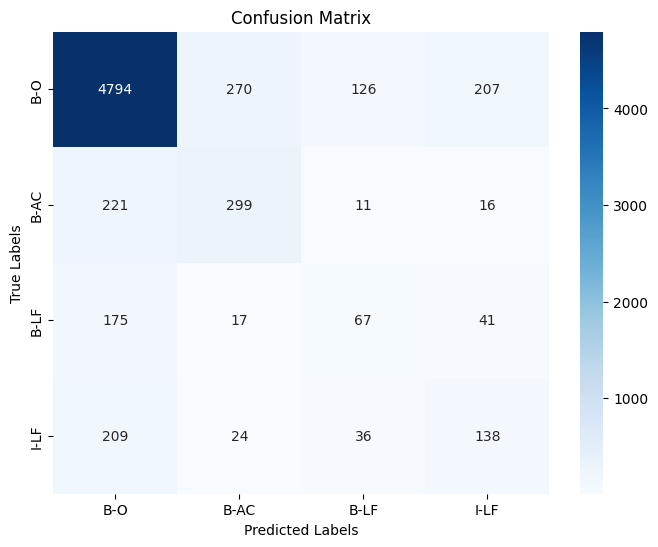

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Extract the confusion matrix from the results dictionary
cm = results['confusion_matrix']

# Remove 'B-' prefix from each label in label_list
cleaned_labels = [label[2:] if label.startswith('B-') else label for label in label_list]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cleaned_labels, yticklabels=cleaned_labels)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the heatmap
plt.show()

## 2.2 BERT FINE-TUNING

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForTokenClassification.from_pretrained("bert-base-uncased", num_labels=4)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
tokenized_datasets = tokenize_and_align_labels(train_dataset, label_list, tokenizer)
tokenized_val_datasets = tokenize_and_align_labels(val_dataset, val_label_list, tokenizer)
tokenized_test_datasets = tokenize_and_align_labels(test_dataset, test_label_list, tokenizer)

In [ ]:
tokenised_train = turn_dict_to_list_of_dict(tokenized_datasets)
tokenised_val = turn_dict_to_list_of_dict(tokenized_val_datasets)
tokenised_test = turn_dict_to_list_of_dict(tokenized_test_datasets)

In [ ]:
from transformers import DataCollatorForTokenClassification
data_collator = DataCollatorForTokenClassification(tokenizer)

In [ ]:
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback

# Training arguments
model_name = "bert-base-uncased"
epochs = 5
batch_size = 4
learning_rate = 2e-5

args = TrainingArguments(
    f"BERT-fulltrain-NER",
    evaluation_strategy = "epoch",
    learning_rate=learning_rate,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=epochs,
    weight_decay=0.001,
)

trainer = Trainer(
    model,
    args,
    train_dataset=tokenised_train,
    eval_dataset=tokenised_val,
    data_collator = data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False)
  warnings.warn(


In [ ]:
trainer.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy,Macro F1
1,No log,0.221430,0.923652,0.923652,0.923652,0.923652,0.827665
2,0.308200,0.207793,0.932661,0.932661,0.932661,0.932661,0.852038
3,0.308200,0.232150,0.929302,0.929302,0.929302,0.929302,0.844387
4,0.145200,0.248119,0.930524,0.930524,0.930524,0.930524,0.846995
5,0.145200,0.258864,0.932814,0.932814,0.932814,0.932814,0.851583


TrainOutput(global_step=1340, training_loss=0.19228172871603894, metrics={'train_runtime': 170.1365, 'train_samples_per_second': 31.504, 'train_steps_per_second': 7.876, 'total_flos': 231978555848064.0, 'train_loss': 0.19228172871603894, 'epoch': 5.0})

In [ ]:
from sklearn.metrics import confusion_matrix

label_list = ['B-B-O', 'B-B-AC', 'B-B-LF', 'B-I-LF']

results = model_evaluate(trainer, tokenised_test, label_list)
results

{'B-AC': {'precision': 0.7584369449378331,
  'recall': 0.7806215722120659,
  'f1': 0.7693693693693694,
  'number': 547},
 'B-LF': {'precision': 0.7699680511182109,
  'recall': 0.8033333333333333,
  'f1': 0.7862969004893965,
  'number': 300},
 'B-O': {'precision': 0.9657303370786516,
  'recall': 0.9555308504724848,
  'f1': 0.9606035205364628,
  'number': 5397},
 'I-LF': {'precision': 0.8022988505747126,
  'recall': 0.8574938574938575,
  'f1': 0.828978622327791,
  'number': 407},
 'overall_precision': 0.9282814614343707,
 'overall_recall': 0.9282814614343707,
 'overall_f1': 0.9282814614343707,
 'overall_accuracy': 0.9282814614343707,
 'macro_f1': 0.8363121031807549,
 'confusion_matrix': array([[5157,  131,   52,   57],
        [ 117,  427,    1,    2],
        [  32,    0,  241,   27],
        [  34,    5,   19,  349]])}

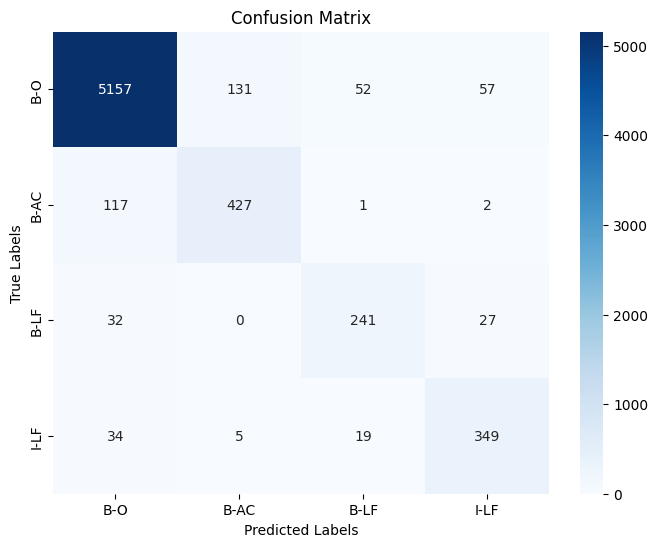

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Extract the confusion matrix from the results dictionary
cm = results['confusion_matrix']

# Remove 'B-' prefix from each label in label_list
cleaned_labels = [label[2:] if label.startswith('B-') else label for label in label_list]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cleaned_labels, yticklabels=cleaned_labels)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the heatmap
plt.show()

# 3. roBERTa

In [ ]:
from transformers import AutoTokenizer

# Initialize the RoBERTa tokenizer
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

## 3.1 roBERTa FULL TRAINING

In [ ]:
from transformers import RobertaConfig, RobertaForTokenClassification

# Create a new configuration for RoBERTa
config = RobertaConfig.from_pretrained("roberta-base")
config.num_labels = 4

# Initialize a new RoBERTa model for token classification without pre-trained weights
model = RobertaForTokenClassification(config=config)

In [ ]:
label_encoding = {"B-O": 0, "B-AC": 1, "B-LF": 2, "I-LF": 3}

label_list = []
for sample in train_dataset["ner_tags"]:
    label_list.append([label_encoding[tag] for tag in sample])

val_label_list = []
for sample in val_dataset["ner_tags"]:
    val_label_list.append([label_encoding[tag] for tag in sample])

test_label_list = []
for sample in test_dataset["ner_tags"]:
    test_label_list.append([label_encoding[tag] for tag in sample])


In [ ]:
tokenized_datasets = tokenize_and_align_labels(train_dataset, label_list, tokenizer)
tokenized_val_datasets = tokenize_and_align_labels(val_dataset, val_label_list, tokenizer)
tokenized_test_datasets = tokenize_and_align_labels(test_dataset, test_label_list, tokenizer)

In [ ]:
tokenised_train = turn_dict_to_list_of_dict(tokenized_datasets)
tokenised_val = turn_dict_to_list_of_dict(tokenized_val_datasets)
tokenised_test = turn_dict_to_list_of_dict(tokenized_test_datasets)

In [ ]:
from transformers import DataCollatorForTokenClassification
data_collator = DataCollatorForTokenClassification(tokenizer)

In [ ]:
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback

# Training
model_name = "roberta-base"
epochs = 20
batch_size = 4
learning_rate = 2e-5

args = TrainingArguments(
    f"RoBERTa-FullTrain-NER",
    evaluation_strategy = "epoch",
    learning_rate=learning_rate,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=epochs,
    weight_decay=0.001,
    metric_for_best_model = 'f1',
)

trainer = Trainer(
    model,
    args,
    train_dataset=tokenised_train,
    eval_dataset=tokenised_val,
    data_collator = data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False)
  warnings.warn(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy,Macro F1
1,No log,0.582459,0.804690,0.804690,0.804690,0.804690,0.322935
2,0.683400,0.541787,0.811457,0.811457,0.811457,0.811457,0.446084
3,0.683400,0.551063,0.810985,0.810985,0.810985,0.810985,0.485450
4,0.504800,0.543616,0.808939,0.808939,0.808939,0.808939,0.534798
5,0.504800,0.545952,0.802014,0.802014,0.802014,0.802014,0.540638
6,0.402400,0.570513,0.813189,0.813189,0.813189,0.813189,0.553208
7,0.402400,0.561989,0.814290,0.814290,0.814290,0.814290,0.567889
8,0.334800,0.569529,0.813031,0.813031,0.813031,0.813031,0.567815
9,0.334800,0.617624,0.795090,0.795090,0.795090,0.795090,0.559151
10,0.278800,0.620830,0.803903,0.803903,0.803903,0.803903,0.569313


/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Checkpoint destination directory RoBERTa-FullTrain-NER/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory RoBERTa-FullTrain-NER/checkpoint-1000 already exists and is non-empty.Saving will proceed but saved results may be invalid.


TrainOutput(global_step=5360, training_loss=0.2845341390638209, metrics={'train_runtime': 675.3659, 'train_samples_per_second': 31.746, 'train_steps_per_second': 7.936, 'total_flos': 901343128995072.0, 'train_loss': 0.2845341390638209, 'epoch': 20.0})

In [ ]:
from sklearn.metrics import confusion_matrix

label_list = ['B-B-O', 'B-B-AC', 'B-B-LF', 'B-I-LF']

results = model_evaluate(trainer, tokenised_test, label_list)
results

{'B-AC': {'precision': 0.5969125214408233,
  'recall': 0.6225402504472272,
  'f1': 0.6094570928196148,
  'number': 559},
 'B-LF': {'precision': 0.29508196721311475,
  'recall': 0.25,
  'f1': 0.2706766917293233,
  'number': 288},
 'B-O': {'precision': 0.8975386376645679,
  'recall': 0.8919226393629124,
  'f1': 0.8947218259629102,
  'number': 5274},
 'I-LF': {'precision': 0.32805429864253394,
  'recall': 0.37275064267352187,
  'f1': 0.34897713598074614,
  'number': 389},
 'overall_precision': 0.8093701996927803,
 'overall_recall': 0.8093701996927803,
 'overall_f1': 0.8093701996927803,
 'overall_accuracy': 0.8093701996927803,
 'macro_f1': 0.5309581866231486,
 'confusion_matrix': array([[4704,  200,  126,  244],
        [ 181,  348,   10,   20],
        [ 169,   14,   72,   33],
        [ 187,   21,   36,  145]])}

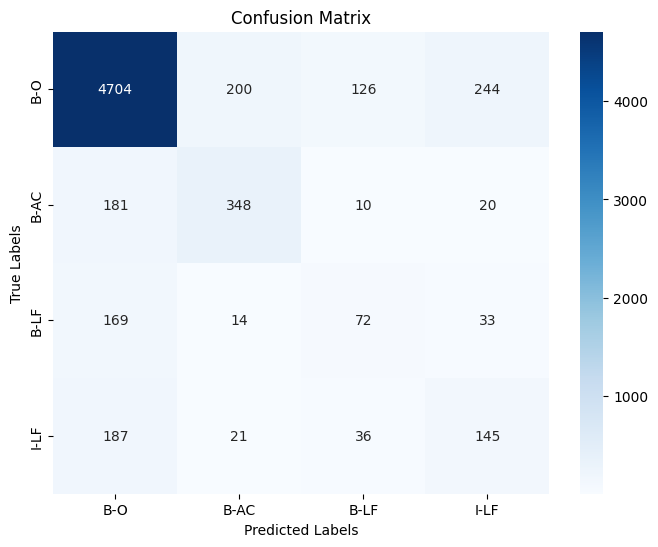

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the confusion matrix from the results dictionary
cm = results['confusion_matrix']

# Remove 'B-' prefix from each label in label_list
cleaned_labels = [label[2:] if label.startswith('B-') else label for label in label_list]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cleaned_labels, yticklabels=cleaned_labels)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the heatmap
plt.show()

## 3.1 roBERTa FINE-TUNING

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification

# Load model
model = AutoModelForTokenClassification.from_pretrained("roberta-base", num_labels=4)

Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
label_encoding = {"B-O": 0, "B-AC": 1, "B-LF": 2, "I-LF": 3}

label_list = []
for sample in train_dataset["ner_tags"]:
    label_list.append([label_encoding[tag] for tag in sample])

val_label_list = []
for sample in val_dataset["ner_tags"]:
    val_label_list.append([label_encoding[tag] for tag in sample])

test_label_list = []
for sample in test_dataset["ner_tags"]:
    test_label_list.append([label_encoding[tag] for tag in sample])


In [ ]:
tokenized_datasets = tokenize_and_align_labels(train_dataset, label_list, tokenizer)
tokenized_val_datasets = tokenize_and_align_labels(val_dataset, val_label_list, tokenizer)
tokenized_test_datasets = tokenize_and_align_labels(test_dataset, test_label_list, tokenizer)

In [ ]:
tokenised_train = turn_dict_to_list_of_dict(tokenized_datasets)
tokenised_val = turn_dict_to_list_of_dict(tokenized_val_datasets)
tokenised_test = turn_dict_to_list_of_dict(tokenized_test_datasets)

In [ ]:
from transformers import DataCollatorForTokenClassification
data_collator = DataCollatorForTokenClassification(tokenizer)

In [ ]:
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback

# Training
model_name = "roberta-base"
epochs = 5
batch_size = 4
learning_rate = 2e-5

args = TrainingArguments(
    f"roBERTa-Finetuned-NER",
    evaluation_strategy = "epoch",
    learning_rate=learning_rate,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=epochs,
    weight_decay=0.001,
    metric_for_best_model = 'f1',
)

trainer = Trainer(
    model,
    args,
    train_dataset=tokenised_train,
    eval_dataset=tokenised_val,
    data_collator = data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False)
  warnings.warn(


In [ ]:
trainer.train()

You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy,Macro F1
1,No log,0.208651,0.929651,0.929651,0.929651,0.929651,0.839536
2,0.283800,0.191801,0.935946,0.935946,0.935946,0.935946,0.859798
3,0.283800,0.210619,0.939251,0.939251,0.939251,0.939251,0.870248
4,0.137900,0.210307,0.942713,0.942713,0.942713,0.942713,0.877790
5,0.137900,0.209570,0.943658,0.943658,0.943658,0.943658,0.879730


TrainOutput(global_step=1340, training_loss=0.1802329547369658, metrics={'train_runtime': 173.8381, 'train_samples_per_second': 30.833, 'train_steps_per_second': 7.708, 'total_flos': 225648119175840.0, 'train_loss': 0.1802329547369658, 'epoch': 5.0})

In [ ]:
from sklearn.metrics import confusion_matrix

label_list = ['B-B-O', 'B-B-AC', 'B-B-LF', 'B-I-LF']

results = model_evaluate(trainer, tokenised_test, label_list)
results

{'B-AC': {'precision': 0.8465703971119134,
  'recall': 0.8389982110912343,
  'f1': 0.8427672955974842,
  'number': 559},
 'B-LF': {'precision': 0.765625,
  'recall': 0.8506944444444444,
  'f1': 0.805921052631579,
  'number': 288},
 'B-O': {'precision': 0.9745664739884393,
  'recall': 0.9590443686006825,
  'f1': 0.966743119266055,
  'number': 5274},
 'I-LF': {'precision': 0.7914798206278026,
  'recall': 0.9074550128534704,
  'f1': 0.8455089820359281,
  'number': 389},
 'overall_precision': 0.9408602150537635,
 'overall_recall': 0.9408602150537635,
 'overall_f1': 0.9408602150537635,
 'overall_accuracy': 0.9408602150537635,
 'macro_f1': 0.8652351123827615,
 'confusion_matrix': array([[5058,   79,   64,   73],
        [  86,  469,    2,    2],
        [  25,    0,  245,   18],
        [  21,    6,    9,  353]])}

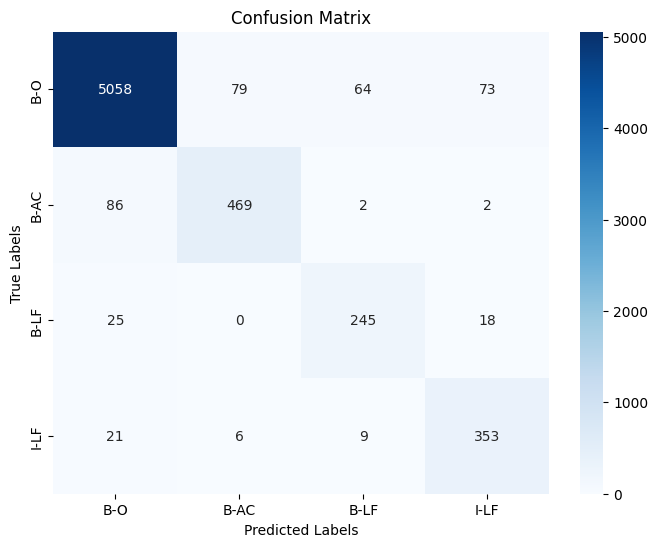

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the confusion matrix from the results dictionary
cm = results['confusion_matrix']

# Remove 'B-' prefix from each label in label_list
cleaned_labels = [label[2:] if label.startswith('B-') else label for label in label_list]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cleaned_labels, yticklabels=cleaned_labels)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the heatmap
plt.show()